In [4]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.logit_estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



#np.random.seed(42)

# Estimation with MLE

In [5]:
# beta should be higher than c
n = 1000 # number of nodes - 585 similar to c elegans
d = 6  # number of neighbouts to take into account

#sigma = np.log(1/1e-3 - 1)    # intercept the higher the harder for creating edges 6
sigma = 8

n_iteration = 100000
warm_up     = 1400 # 10k

################################################
params_dict = {
    "n": n,
    "d": d,
    "sigma": sigma,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [6]:
graph_model = graph.GraphModel(n=n, d=d, sigma=sigma)
graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, threshold = 5, stability_window = 10)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

In [7]:
g = graphs[-1]

# Estimation with regression 

In [8]:
est = estimator.LogitRegEstimator(g , d=0)

In [9]:
features, labels = est.get_features_labels()

In [10]:
result, params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)

print('real: ', -sigma)
print('est: ', params[0])

                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.046      
Date:               2024-07-09 16:37 AIC:              18372.9343 
No. Observations:   499500           BIC:              18406.2984 
Df Model:           2                Log-Likelihood:   -9183.5    
Df Residuals:       499497           LL-Null:          -9626.0    
Converged:          1.0000           LLR p-value:      6.2989e-193
No. Iterations:     33.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -8.0231     0.0854   -93.9171   0.0000   -8.1906   -7.8557
x1         0.3321     0.0154    21.5687   0.0000    0.3019    0.3623
x2         0.3283     0.0153    21.4886   0.0000    0.2984    0.3582

real:  -

In [11]:
summary = result.summary2()
summary.tables[1].loc['const']


Coef.       -8.023136
Std.Err.     0.085428
z          -93.917056
P>|z|        0.000000
[0.025      -8.190572
0.975]      -7.855700
Name: const, dtype: float64

# Plot the curve d X estimation 

In [14]:
d_range = range(4)
pathfolder = f'runs/d_multiple_sigma_{sigma}'

# Create the directory if it does not exist
if not os.path.exists(pathfolder):
    os.makedirs(pathfolder)

In [15]:
params_list = []
result_list = []

for d in d_range:
    # Simulation
    graph_model = graph.GraphModel(n=n, d=d, sigma=sigma)
    graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, threshold = 5, stability_window = 10)
    g = graphs[-1]
    import gc
    del graphs
    gc.collect()

    # Estimation
    est = estimator.LogitRegEstimator(g, d=d)
    features, labels = est.get_features_labels()
    result, params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)

    params_list.append(params)
    result_list.append(result)
    import pickle
    with open(f'{pathfolder}/results_array_{d}.pkl', 'wb') as f:
        pickle.dump(result_list, f)



iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.033      
Date:               2024-07-09 16:39 AIC:              18616.0677 
No. Observations:   499500           BIC:              18649.4318 
Df Model:           2                Log-Likelihood:   -9305.0    
Df Residuals:       499497           LL-Null:          -9626.0    
Converged:          1.0000           LLR p-value:      3.9356e-140
No. Iterations:     25.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.4411     0.0735   -101.2154   0.0000   -7.5852   -7.2970
x1        0.0215     0.0012     18.0679   0.0000    0.0192    0.0238
x2        0.0221     0.0012     19.1010   0.0000    0.0198    0.0243

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.033      
Date:               2024-07-09 16:39 AIC:              18627.5965 
No. Observations:   499500           BIC:              18660.9606 
Df Model:           2                Log-Likelihood:   -9310.8    
Df Residuals:       499497           LL-Null:          -9626.0    
Converged:          1.0000           LLR p-value:      1.2544e-137
No. Iterations:     22.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.4125     0.0736   -100.7552   0.0000   -7.5567   -7.2683
x1        0.0078     0.0004     17.6916   0.0000    0.0070    0.0087
x2        0.0087     0.0005     18.7095   0.0000    0.0078    0.0096



# Analysis of result

In [16]:
x = np.array(params_list)
x[:, 0]

array([-7.90292198, -7.67152755, -7.44111863, -7.41248658])

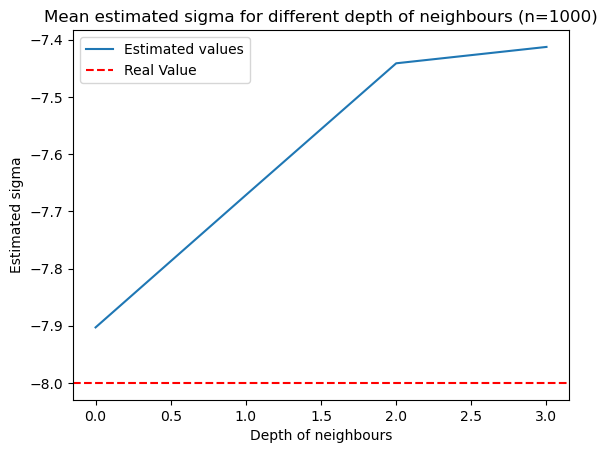

In [17]:
plt.figure()
plt.plot(d_range, x[:,0], label='Estimated values')

plt.axhline(y=-sigma, color='r', linestyle='--', label='Real Value')

plt.legend()
plt.xlabel('Depth of neighbours')
plt.ylabel('Estimated sigma')
plt.title(f'Mean estimated sigma for different depth of neighbours (n={n})')
plt.show()

In [18]:
d_range

range(0, 4)